###### Not the most ideal path, this is a learning journey

Importing necessary modules

In [152]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

Downloading MNIST images, and specifing path

In [153]:
path = untar_data(URLs.MNIST)
# Path.BASE_PATH = path
path.ls()

(#2) [Path('C:/Users/Home/.fastai/data/mnist_png/testing'),Path('C:/Users/Home/.fastai/data/mnist_png/training')]

In [154]:
(path/'training').ls()

(#10) [Path('C:/Users/Home/.fastai/data/mnist_png/training/0'),Path('C:/Users/Home/.fastai/data/mnist_png/training/1'),Path('C:/Users/Home/.fastai/data/mnist_png/training/2'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3'),Path('C:/Users/Home/.fastai/data/mnist_png/training/4'),Path('C:/Users/Home/.fastai/data/mnist_png/training/5'),Path('C:/Users/Home/.fastai/data/mnist_png/training/6'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7'),Path('C:/Users/Home/.fastai/data/mnist_png/training/8'),Path('C:/Users/Home/.fastai/data/mnist_png/training/9')]

In [155]:
threes = (path/'training/3').ls().sorted()
threes

(#6131) [Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10000.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10011.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10031.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10034.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10042.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10052.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/1007.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10074.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10091.png')...]

In [156]:
sevens = (path/'training/7').ls().sorted()
sevens

(#6265) [Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10002.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/1001.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10014.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10019.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10039.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10046.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10050.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10063.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10077.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10086.png')...]

Using Image class to display the images

In [157]:
for i in range(3):
    display(Image.open(threes[i]))
    display(Image.open(sevens[i]))

Using matplotlib to display the images (not necessary)

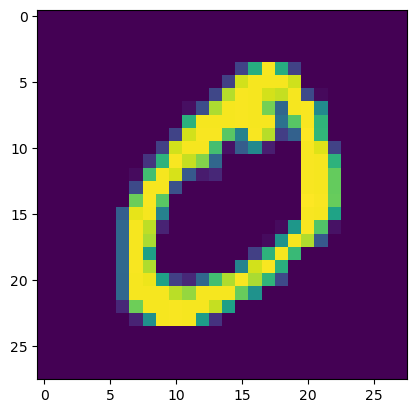

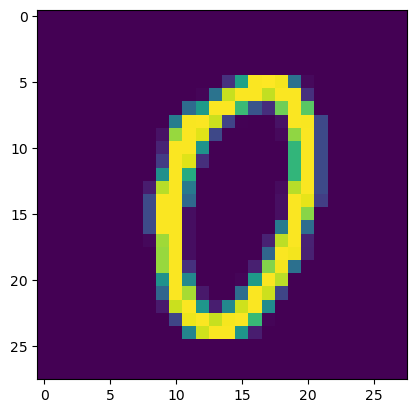

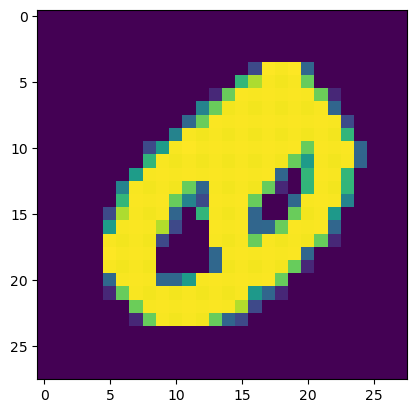

In [158]:

path_img = path/'training'/'0'

for i in get_image_files(path_img)[:3]:
    img = plt.imread(i)
    plt.imshow(img)
    plt.show()


Using show_image to show images

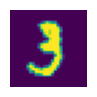

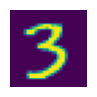

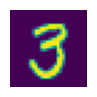

In [159]:
for i in range(3):
    show_image(Image.open(threes[i]))

Seeing how the image is represented in the computer

In [160]:
Image.open(sevens[1])

In [161]:
s = tensor(Image.open(sevens[2]))
s

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [162]:
df = pd.DataFrame(s[3:28,3:28])
df = df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,13,135,147,147,147,147,147,147,122,39,2,0,0,0,0,0,0,0,0
4,0,0,93,185,185,185,207,254,254,254,254,254,254,254,254,254,43,0,0,0,0,0,0,0,0
5,0,0,253,254,254,254,253,198,140,140,140,140,140,196,253,254,119,0,0,0,0,0,0,0,0
6,0,0,128,254,233,103,70,0,0,0,0,0,0,4,183,254,101,0,0,0,0,0,0,0,0
7,0,0,26,232,140,0,0,0,0,0,0,0,0,57,254,254,10,0,0,0,0,0,0,0,0
8,0,0,0,185,238,5,0,0,0,0,0,0,0,135,254,166,2,0,0,0,0,0,0,0,0
9,0,0,0,185,254,103,0,0,0,0,0,0,18,242,243,81,0,0,0,0,0,0,0,0,0


Comparing pixels

In [163]:
sevens_tensor = [tensor(Image.open(o)) for o in sevens]
threes_tensor = [tensor(Image.open(o)) for o in threes]
len(sevens_tensor), len(threes_tensor)


(6265, 6131)

<AxesSubplot:>

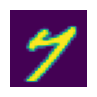

In [164]:
show_image(sevens_tensor[1])

In [165]:
stacked_sevens = torch.stack(sevens_tensor).float()/255
stacked_threes = torch.stack(threes_tensor).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

###### We have created a rank 3 tensor with all the images stacked over other.

In [166]:
stacked_sevens.ndim # Rank

3

Ideal three and seven

###### We take the average of all 3's and 7's in the dataset and show it. This is our ideal three and seven.

<AxesSubplot:>

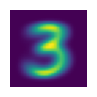

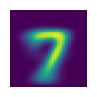

In [167]:
mean_3 = stacked_threes.mean(0)
show_image(mean_3)
mean_7 = stacked_sevens.mean(0)
show_image(mean_7)


In [168]:
print((mean_3 - stacked_threes).abs().mean())
print((mean_7 - stacked_sevens).abs().mean())
(mean_3 - stacked_threes[1]).abs().mean()

tensor(0.1313)
tensor(0.1096)


tensor(0.1114)

In [169]:
def is_3(x):
    return (x - mean_3).abs().mean((-1,-2)) < (x - mean_7).abs().mean((-1,-2))

Testing 7 and 3

In [ ]:
valid_3 = (path/'testing'/'3').ls()
valid_3 = [tensor(Image.open(o)) for o in valid_3]
test_3 = torch.stack(valid_3).float()
print(test_3.shape)

valid_7 = (path/'testing'/'7').ls()
valid_7 = [tensor(Image.open(o)) for o in valid_7]
test_7 = torch.stack(valid_7).float()


Accuracy

In [176]:
print(is_3(test_3).float().mean())
print(1 - is_3(test_7).float().mean())

tensor(0.9436)
tensor(0.9815)


###### Thus we have an accuracy of 94 and 98 % in predicting 3's and 7's